# Programming with Python - 5.Making Choices
In our last lesson, we discovered something suspicious was going on in our inflammation data by drawing some plots. How can we use Python to automatically recognize the different features we saw, and take a different action for each? In this lesson, we’ll learn how to write code that runs only when certain conditions are true.

# Conditionals
We can ask Python to take different actions, depending on a condition, with an if statement:

In [8]:
import numpy
num = 37
if num > 100:
    print('greater')
else:
    print('not greater')
print('done')

not greater
done


The second line of this code uses the keyword if to tell Python that we want to make a choice. If the test that follows the if statement is true, the body of the if (i.e., the lines indented underneath it) are executed. If the test is false, the body of the else is executed instead. Only one or the other is ever executed:
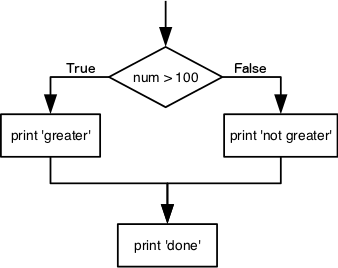
Conditional statements don’t have to include an else. If there isn’t one, Python simply does nothing if the test is false:

In [9]:
num = 53
print('before conditional...')
if num > 100:
    print('53 is greater than 100')
print('...after conditional')

before conditional...
...after conditional


We can also chain several tests together using elif, which is short for “else if”. The following Python code uses elif to print the sign of a number.

In [10]:
num = -3

if num > 0:
    print(num, "is positive")
elif num == 0:
    print(num, "is zero")
else:
    print(num, "is negative")

(-3, 'is negative')


One important thing to notice in the code above is that we use a double equals sign == to test for equality rather than a single equals sign because the latter is used to mean assignment.

We can also combine tests using and and or. and is only true if both parts are true:

In [11]:
if (1 > 0) and (-1 > 0):
    print('both parts are true')
else:
    print('at least one part is false')

at least one part is false


while or is true if at least one part is true:

In [12]:
if (1 < 0) or (-1 < 0):
    print('at least one test is true')

at least one test is true


# Checking our Data
Now that we’ve seen how conditionals work, we can use them to check for the suspicious features we saw in our inflammation data. In the first couple of plots, the maximum inflammation per day seemed to rise like a straight line, one unit per day. We can check for this inside the for loop we wrote with the following conditional:

In [14]:
# if numpy.max(data, axis=0)[0] == 0 and numpy.max(data, axis=0)[20] == 20:
#    print('Suspicious looking maxima!')

We also saw a different problem in the third dataset; the minima per day were all zero (looks like a healthy person snuck into our study). We can also check for this with an elif condition:



In [15]:
# elif numpy.sum(numpy.min(data, axis=0)) == 0:
#     print('Minima add up to zero!')

And if neither of these conditions are true, we can use else to give the all-clear:

In [16]:
# else:
#     print('Seems OK!')

Let’s test that out:

In [21]:
data = numpy.loadtxt(fname='data/inflammation-01.csv', delimiter=',')
if numpy.max(data, axis=0)[0] == 0 and numpy.max(data, axis=0)[20] == 20:
    print('Suspicious looking maxima!')
elif numpy.sum(numpy.min(data, axis=0)) == 0:
    print('Minima add up to zero!')
else:
    print('Seems OK!')

Suspicious looking maxima!


In [22]:
data = numpy.loadtxt(fname='data/inflammation-03.csv', delimiter=',')
if numpy.max(data, axis=0)[0] == 0 and numpy.max(data, axis=0)[20] == 20:
    print('Suspicious looking maxima!')
elif numpy.sum(numpy.min(data, axis=0)) == 0:
    print('Minima add up to zero!')
else:
    print('Seems OK!')

Minima add up to zero!


In this way, we have asked Python to do something different depending on the condition of our data. Here we printed messages in all cases, but we could also imagine not using the else catch-all so that messages are only printed when something is wrong, freeing us from having to manually examine every plot for features we’ve seen before.

# How Many Paths?

Consider this code:

In [23]:
if 4 > 5:
    print('A')
elif 4 == 5:
    print('B')
elif 4 < 5:
    print('C')

C


Which of the following would be printed if you were to run this code? Why did you pick this answer?

1, A

2, B

3, C

4,B and C

In [26]:
answer = "C gets printed because the first two conditions, 4 > 5 and 4 == 5, are not true, but 4 < 5 is true."

In [27]:
print answer

C gets printed because the first two conditions, 4 > 5 and 4 == 5, are not true, but 4 < 5 is true.


# What Is Truth?
True and False are special words in Python called booleans which represent true and false statements. However, they aren’t the only values in Python that are true and false. In fact, any value can be used in an if or elif. After reading and running the code below, explain what the rule is for which values are considered true and which are considered false.

In [28]:
if '':
    print('empty string is true')
if 'word':
    print('word is true')
if []:
    print('empty list is true')
if [1, 2, 3]:
    print('non-empty list is true')
if 0:
    print('zero is true')
if 1:
    print('one is true')

word is true
non-empty list is true
one is true


# That’s Not Not What I Meant
Sometimes it is useful to check whether some condition is not true. The Boolean operator not can do this explicitly. After reading and running the code below, write some if statements that use not to test the rule that you formulated in the previous challenge.

In [29]:
if not '':
    print('empty string is not true')
if not 'word':
    print('word is not true')
if not not True:
    print('not not True is true')

empty string is not true
not not True is true


# Close Enough
Write some conditions that print True if the variable a is within 10% of the variable b and False otherwise. Compare your implementation with your partner’s: do you get the same answer for all possible pairs of numbers?

In [30]:
a = 5
b = 5.1

if abs(a - b) < 0.1 * abs(b):
    print('True')
else:
    print('False')

True


In [31]:
print(abs(a - b) < 0.1 * abs(b))
# This works because the Booleans True and False have string representations which can be printed.

True


# In-Place Operators
Python (and most other languages in the C family) provides in-place operators that work like this:

In [32]:
x = 1  # original value
x += 1 # add one to x, assigning result back to x
x *= 3 # multiply x by 3
print(x)

6


Write some code that sums the positive and negative numbers in a list separately, using in-place operators. Do you think the result is more or less readable than writing the same without in-place operators?

In [34]:
positive_sum = 0
negative_sum = 0
test_list = [3, 4, 6, 1, -1, -5, 0, 7, -8]
for num in test_list:
    if num > 0:
        positive_sum += num
    elif num == 0:
        pass
    else:
        negative_sum += num
print(positive_sum, negative_sum)
# Here pass means “don’t do anything”. In this particular case, it’s not actually needed, 
# since if num == 0 neither sum needs to change, but it illustrates the use of elif and pass.

(21, -14)


# Sorting a List Into Buckets
The folder containing our data files has large data sets whose names start with “inflammation-“, small ones whose names with “small-“, and possibly other files whose sizes we don’t know. Our goal is to sort those files into three lists called large_files, small_files, and other_files respectively. Add code to the template below to do this. Note that the string method startswith returns True if and only if the string it is called on starts with the string passed as an argument.

In [36]:
files = ['data/inflammation-01.csv', 'code/myscript.py', 'data/inflammation-02.csv', 'data/small-01.csv',
         'data/small-02.csv']
large_files = []
small_files = []
other_files = []

Your solution should:

1, loop over the names of the files

2,figure out which group each filename belongs

3, append the filename to that list

In the end the three lists should be:

In [37]:
large_files = ['inflammation-01.csv', 'inflammation-02.csv']
small_files = ['small-01.csv', 'small-02.csv']
other_files = ['myscript.py']

In [38]:
for file in files:
    if 'inflammation-' in file:
        large_files.append(file)
    elif 'small-' in file:
        small_files.append(file)
    else:
        other_files.append(file)
        
print(large_files)
print(small_files)
print(other_files)

['inflammation-01.csv', 'inflammation-02.csv', 'data/inflammation-01.csv', 'data/inflammation-02.csv']
['small-01.csv', 'small-02.csv', 'data/small-01.csv', 'data/small-02.csv']
['myscript.py', 'code/myscript.py']


# Counting Vowels
1, Write a loop that counts the number of vowels in a character string.

2, Test it on a few individual words and full sentences.

3, Once you are done, compare your solution to your neighbor’s.Did you make the same decisions about how to handle the letter ‘y’ (which some people think is a vowel, and some do not)?

In [39]:
vowels = 'aeiouAEIOU'
sentence = 'Mary had a little lamb.'
count = 0
for char in sentence:
    if char in vowels:
        count += 1
        
print("The number of vowels in this string is " + str(count))

The number of vowels in this string is 6


# Key Points
- Use if condition to start a conditional statement, elif condition to provide additional tests, and else to provide a default.
- The bodies of the branches of conditional statements must be indented.
- Use == to test for equality.
- X and Y is only true if both X and Y are true.
- X or Y is true if either X or Y, or both, are true.
- Zero, the empty string, and the empty list are considered false; all other numbers, strings, and lists are considered true.
- Nest loops to operate on multi-dimensional data.
- Put code whose parameters change frequently in a function, then call it with different parameter values to customize its behavior.